In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chisquare
from scipy.stats import ttest_ind
import geopandas
from IPython.display import display


In [2]:
#
# Handle missing values: You can either drop or impute missing values.
# Remove duplicates: Ensure that your dataset doesn't have duplicate rows.


In [3]:
college_df = pd.read_excel(io='data/geocode_college_with_address.xlsx', index_col=0)
college_df.value_counts()

# Droping columns high uniques values.
college_df.drop(['ddresAs1', 'Address2', 'Latitude', 'Longitude','Zip Code', 'Region', 'County'], axis=1, inplace=True)
print(college_df.shape)
print(college_df.dtypes)

(1302, 19)
State                           object
Public/Private                   int64
Applicantions Received         float64
Applications Accepted          float64
New Students Enrolled          float64
% New Students from Top 10%    float64
% New Students from Top 25%    float64
# FT undergrad                 float64
# PT undergrad                 float64
in-state tuition               float64
out-of-state tuition           float64
room                           float64
board                          float64
add. fees                      float64
estim. book costs              float64
Estimated Personal Cost        float64
Faculty with PHD               float64
Student to Faculty Ratio       float64
Graduation rate                float64
dtype: object


In [4]:
### Hot encoding
import pandas as pd

# One-Hot Encoding with Drop-First
df_encoded = pd.get_dummies(college_df, drop_first=True)
print(df_encoded.shape)

(1302, 68)


In [39]:
# IMPUTE data, Median Imputation
college_imputed_df= df_encoded.apply(lambda x: x.fillna(x.median()), axis=0)
print(college_imputed_df.shape)


(1302, 68)


In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler

# Assume X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(college_imputed_df)


### SCREE Plot

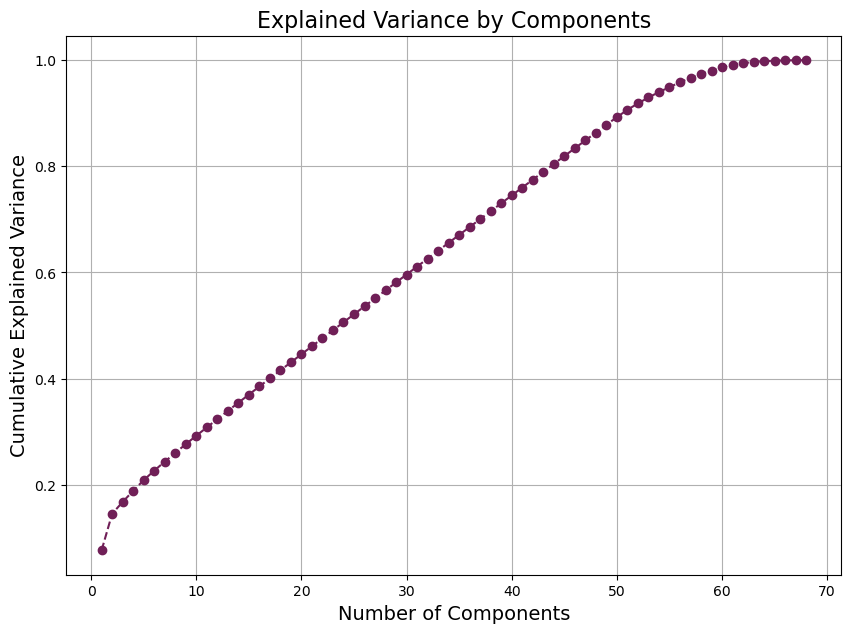

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume X_scaled is your standardized data
pca = PCA().fit(X_scaled)

# Plotting the explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='#701f57')
plt.title('Explained Variance by Components', size=16)
plt.xlabel('Number of Components', size=14)
plt.ylabel('Cumulative Explained Variance', size=14)
plt.grid(True)
plt.savefig('images/Scree-elbow-varience.png')
plt.show()


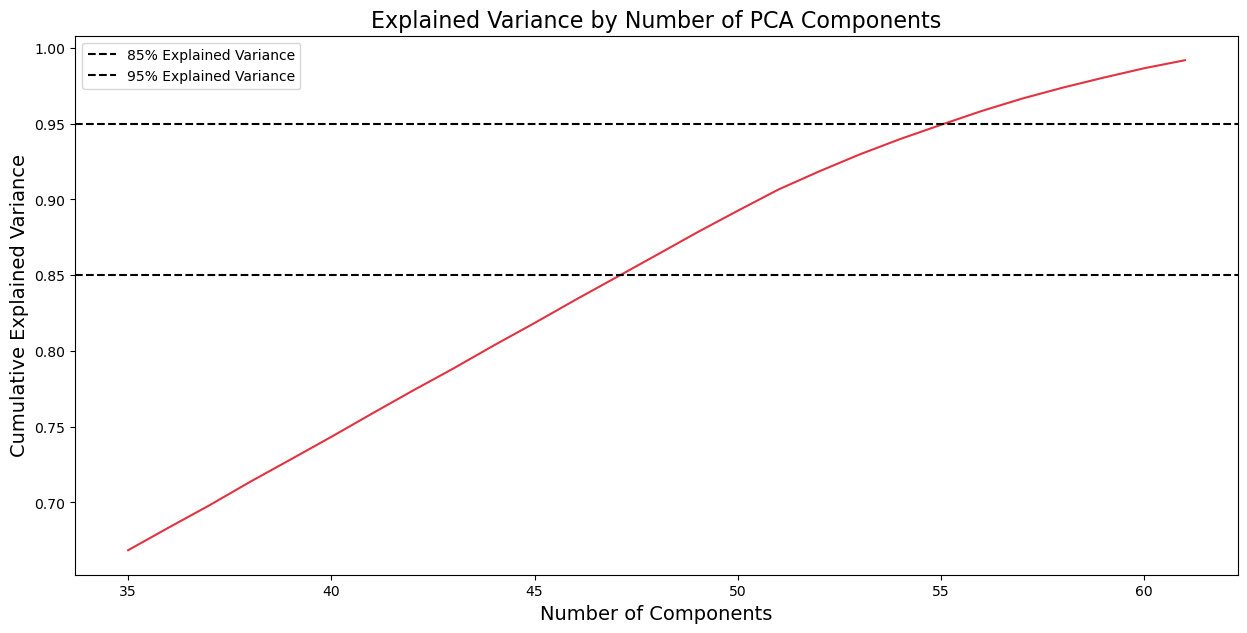

In [34]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca_df = pd.DataFrame()
pca_df['Covered Variance'] = ""
pca_df['n_components'] = ""

totalvariance = []
n_components = []
for i in range(35, 62):
    X_scaled = scaler.fit_transform(college_imputed_df)
    pca = PCA(n_components=i)
    ccinfo_pca = pca.fit_transform(X_scaled)
    variance = pca.explained_variance_ratio_.sum()   
    rowcount = i 
    totalvariance.append(variance)
    n_components.append(i)

pca_df['Covered Variance'] = totalvariance
pca_df['n_components'] = n_components

plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='n_components', y='Covered Variance', data=pca_df, color='#e13342')
ax.axhline(y = 0.85, color='black', linestyle='--', label = '85% Explained Variance')
ax.axhline(y = 0.95, color='black', linestyle='--', label = '95% Explained Variance')
plt.title('Explained Variance by Number of PCA Components', size=16)
plt.xlabel('Number of Components', size=14)
plt.ylabel('Cumulative Explained Variance', size=14)
plt.legend(loc='best')
plt.savefig('images/pca_components.png')
plt.show()